This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

All personally identifying information has been removed from the data.


https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/SAA 23-24/PVoluntaria/hotel_bookings.csv')

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# **PREPARACIÓN DE DATOS**

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df = df.drop('company', 1)

<ipython-input-6-52f9bd8e698f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('company', 1)


In [ ]:
df['country'] = df['country'].fillna('PRT')
df['country'].isna().sum()

0

In [ ]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [ ]:
#pip install pycountry

In [ ]:
#pip install pycountry-convert

In [1]:
import pycountry_convert as pc

def country_to_continent(country_name):
    try:
      if(len(country_name) > 2):
        country_alpha2 = pc.country_alpha3_to_country_alpha2(country_name)
      else:
        country_alpha2 = country_name
      country_continent_name = pc.country_alpha2_to_continent_code(country_alpha2)
      return country_continent_name
    except:
      return 'PRT'

country_to_continent('QAT')

ModuleNotFoundError: No module named 'pycountry_convert'

In [ ]:
df['country'] = df['country'].map(lambda x: 'EUROPE' if (country_to_continent(x) == 'EU') else 'Others')

In [ ]:
df['country'] = df['country'].astype('category').cat.codes
df['country']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: country, Length: 119390, dtype: int8

In [ ]:
df.country.value_counts()

0    108314
1     11076
Name: country, dtype: int64

In [ ]:
import numpy as np
df['agent'] = df['agent'].fillna(np.random.randint(535))
df['agent'].isna().sum()

0

In [ ]:
import numpy as np
df['agent'].mode()

0    9.0
Name: agent, dtype: float64

In [ ]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [ ]:
df['children'] = df['children'].fillna(0.0)
df['children'].isna().sum()

0

In [ ]:
df['arrival_date_month'] = df['arrival_date_month'].astype('category')
df['arrival_date_month'] = df['arrival_date_month'].cat.codes
df['arrival_date_month']

0         5
1         5
2         5
3         5
4         5
         ..
119385    1
119386    1
119387    1
119388    1
119389    1
Name: arrival_date_month, Length: 119390, dtype: int8

In [ ]:
df['hotel'] = df['hotel'].map({'Resort Hotel': 1, 'City Hotel': 2})
df['hotel']

0         1
1         1
2         1
3         1
4         1
         ..
119385    2
119386    2
119387    2
119388    2
119389    2
Name: hotel, Length: 119390, dtype: int64

In [ ]:
df['deposit_type'] = df['deposit_type'].map({'No Deposit': 1, 'Refundable': 2, 'Non Refund': 3})
df['deposit_type']

0         1
1         1
2         1
3         1
4         1
         ..
119385    1
119386    1
119387    1
119388    1
119389    1
Name: deposit_type, Length: 119390, dtype: int64

In [ ]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [ ]:
df['customer_type'] = df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})
df['customer_type']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: customer_type, Length: 119390, dtype: int64

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,3,1,26.0,0,0,0.0,0,0,Check-Out,2015-07-01
1,1,0,737,2015,5,27,1,0,0,2,...,4,1,26.0,0,0,0.0,0,0,Check-Out,2015-07-01
2,1,0,7,2015,5,27,1,0,1,1,...,0,1,26.0,0,0,75.0,0,0,Check-Out,2015-07-02
3,1,0,13,2015,5,27,1,0,1,1,...,0,1,304.0,0,0,75.0,0,0,Check-Out,2015-07-02
4,1,0,14,2015,5,27,1,0,2,2,...,0,1,240.0,0,0,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [ ]:
df['reservation_status'] = df['reservation_status'].astype('category').cat.codes
df['reservation_status']

0         1
1         1
2         1
3         1
4         1
         ..
119385    1
119386    1
119387    1
119388    1
119389    1
Name: reservation_status, Length: 119390, dtype: int8

In [ ]:
df = df.drop('reservation_status_date', 1)

<ipython-input-27-8caa4da7cec0>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('reservation_status_date', 1)


In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1,0,342,2015,5,27,1,0,0,2,...,C,3,1,26.0,0,0,0.0,0,0,1
1,1,0,737,2015,5,27,1,0,0,2,...,C,4,1,26.0,0,0,0.0,0,0,1
2,1,0,7,2015,5,27,1,0,1,1,...,C,0,1,26.0,0,0,75.0,0,0,1
3,1,0,13,2015,5,27,1,0,1,1,...,A,0,1,304.0,0,0,75.0,0,0,1
4,1,0,14,2015,5,27,1,0,2,2,...,A,0,1,240.0,0,0,98.0,0,1,1


In [ ]:
df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [ ]:
df['assigned_room_type'] = df['assigned_room_type'].astype('category').cat.codes
df['assigned_room_type']

0         2
1         2
2         2
3         0
4         0
         ..
119385    0
119386    4
119387    3
119388    0
119389    0
Name: assigned_room_type, Length: 119390, dtype: int8

In [ ]:
df['meal'].unique()
df['meal'] = df['meal'].astype('category').cat.codes
df['meal']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    2
Name: meal, Length: 119390, dtype: int8

In [ ]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
df['market_segment'] = df['market_segment'].astype('category').cat.codes
df['market_segment']

0         3
1         3
2         3
3         2
4         6
         ..
119385    5
119386    6
119387    6
119388    6
119389    6
Name: market_segment, Length: 119390, dtype: int8

In [ ]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
df['distribution_channel'] = df['distribution_channel'].astype('category').cat.codes
df['distribution_channel']

0         1
1         1
2         1
3         0
4         3
         ..
119385    3
119386    3
119387    3
119388    3
119389    3
Name: distribution_channel, Length: 119390, dtype: int8

In [ ]:
df = df.drop('reserved_room_type', 1)

<ipython-input-36-f75d82b52c76>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('reserved_room_type', 1)


# **REDUCCIÓN DIMENSIONALIDAD**

## **Feature importance**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

X = df.drop("is_canceled",1)
y = df["is_canceled"]
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) # Use inbuilt class

<ipython-input-37-124ba146cab2>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("is_canceled",1)


[6.82963923e-03 1.90045791e-02 3.68048256e-03 2.02028819e-03
 2.56850691e-03 2.06882259e-03 1.99226281e-03 2.37096220e-03
 1.79265407e-03 1.21369074e-03 1.17110820e-04 1.96619816e-03
 1.98595836e-03 1.01849938e-02 8.95737285e-03 2.06816221e-03
 7.55902778e-03 2.64101396e-04 5.01312852e-03 2.55714694e-03
 1.23066675e-01 5.12858542e-03 6.13978005e-04 8.83809655e-03
 3.91557764e-03 9.15300167e-03 1.46456647e-02 7.50423332e-01]


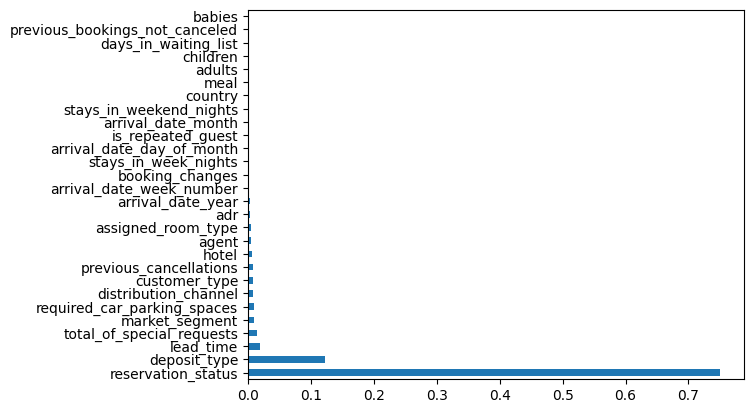

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [ ]:
X_feat_importance = pd.DataFrame(columns = ['reservation_status', 'deposit_type'])
X_feat_importance['reservation_status'] = df['reservation_status']
X_feat_importance['deposit_type'] = df['deposit_type']
X_feat_importance

,reservation_status,deposit_type
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
119385,1,1
119386,1,1
119387,1,1
119388,1,1


## **Correlation (Pearson)**

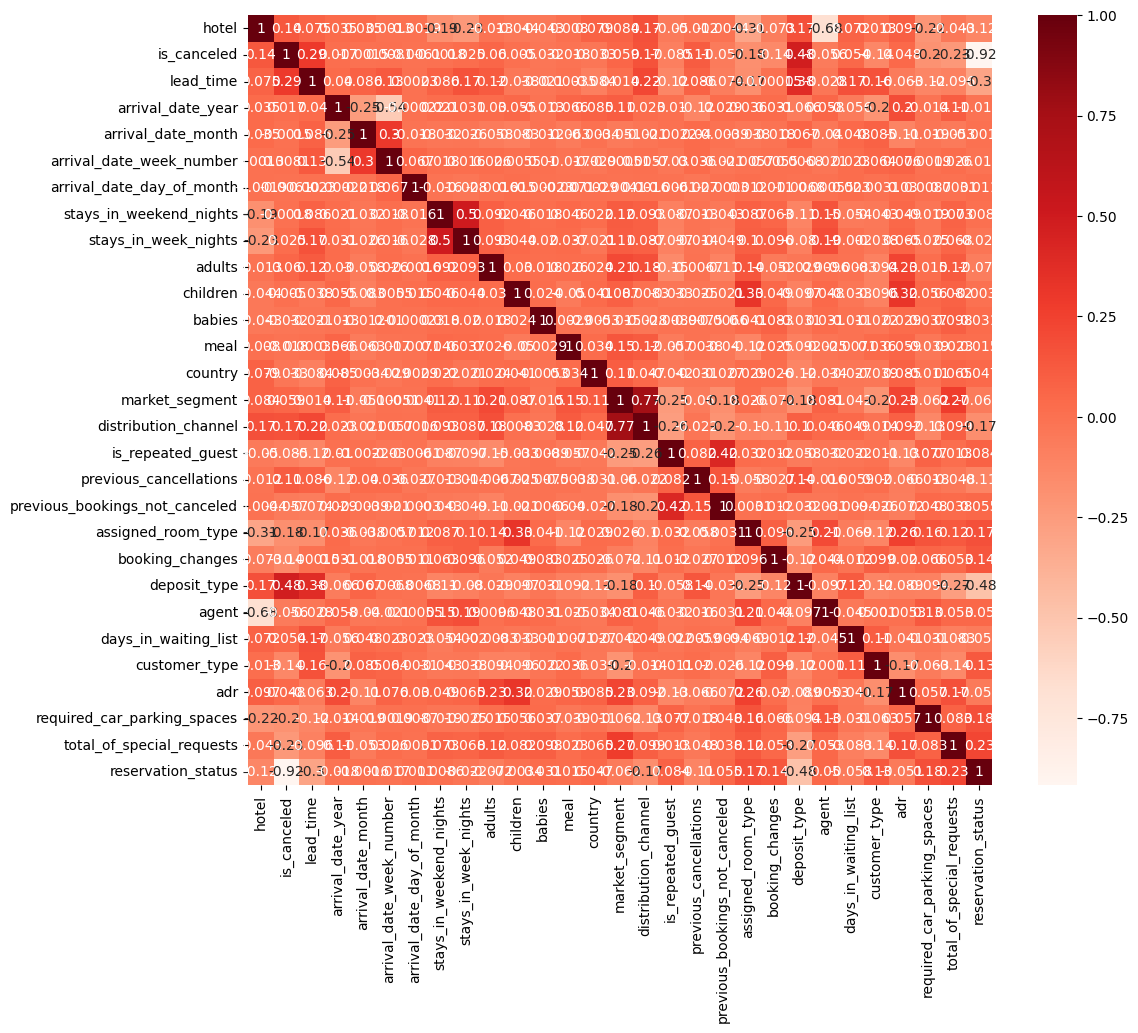

In [ ]:
import seaborn as sns
cor = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
cor_target = abs(cor["is_canceled"])
# ¿Cuales son aquellas variables que más correlacionadas están?
relevant_features = cor_target[cor_target>0.2]
relevant_features

is_canceled                  1.000000
lead_time                    0.293123
deposit_type                 0.480434
total_of_special_requests    0.234658
reservation_status           0.917196
Name: is_canceled, dtype: float64

In [ ]:
#Aquí eliminaría total_of_special_requests, lead_time y deposit_type por estar bien relacionadas y estar menos relacionadas que reservation_status

## **Backward elimination**

In [ ]:
import statsmodels.api as sm

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'meal', 'country', 'market_segment', 'distribution_channel', 'previous_cancellations', 'previous_bookings_not_canceled', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status']


In [ ]:
#aquí hariamos un dataframe con las columnas que ha elegido

## **PCA**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(X)# Ahora si, escalo los datos y los normalizo
X_scaled

array([[-1.40722407,  2.22705112, -1.63476794, ..., -0.25487288,
        -0.72069411,  0.70352647],
       [-1.40722407,  5.9233847 , -1.63476794, ..., -0.25487288,
        -0.72069411,  0.70352647],
       [-1.40722407, -0.90781407, -1.63476794, ..., -0.25487288,
        -0.72069411,  0.70352647],
       ...,
       [ 0.71061889, -0.65515329,  1.19219514, ..., -0.25487288,
         4.32474574,  0.70352647],
       [ 0.71061889,  0.0466822 ,  1.19219514, ..., -0.25487288,
        -0.72069411,  0.70352647],
       [ 0.71061889,  0.94503163,  1.19219514, ..., -0.25487288,
         1.80202581,  0.70352647]])

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=28)
pca.fit(X_scaled)
X_pca=pca.transform(X_scaled)

In [ ]:
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:23]))

shape of X_pca (119390, 28)
[0.09948247 0.09300235 0.06982268 0.06047887 0.05403085 0.04631441
 0.04522213 0.03912893 0.03737313 0.03586878 0.03550683 0.03467447
 0.03357747 0.03230973 0.03171124 0.03015039 0.02790062 0.02739837
 0.02618669 0.02295346 0.02017844 0.01953858 0.01834804 0.0175309
 0.01661489 0.01050424 0.00907303 0.00511803]
suma: 0.9411589072242603


In [ ]:
#Aquí haríamos PCA con 23 elementos, porque a partir de ahí la varianza no sube nada

# **APRENDIZAJE SUPERVISADO**

La variable objetivo es is_canceled

## **REGRESIÓN**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_feat_importance,y, test_size = 0.2)


In [ ]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression()

# Entrenamos el agoritmo con los datos
regr.fit(X_train, y_train)

# Hacemos las predicciones con el test
y_pred = regr.predict(X_test)

In [ ]:
print(y_pred[0])
print(y_test.iloc[0])

0
0


In [ ]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9906608593684563


## **SVM FEATURE IMPORTANCE**

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred2 = clf.predict(X_test)

In [ ]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.9906608593684563


## **DECISION TREES CON FEATURE IMPORTANCE**

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
#Entrenamos
clfdtree = clf.fit(X_train, y_train)

In [ ]:
y_pred3 = clfdtree.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

Accuracy: 1.0


# **MÉTRICAS**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, y_pred3)

array([[14963,     0],
       [    0,  8915]])

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15186
           1       0.97      1.00      0.99      8692

    accuracy                           0.99     23878
   macro avg       0.99      0.99      0.99     23878
weighted avg       0.99      0.99      0.99     23878



In [ ]:
print(classification_report(y_pred2, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15186
           1       0.97      1.00      0.99      8692

    accuracy                           0.99     23878
   macro avg       0.99      0.99      0.99     23878
weighted avg       0.99      0.99      0.99     23878



In [ ]:
#Nos q
print(classification_report(y_pred3, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14963
           1       1.00      1.00      1.00      8915

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



## Nos quedaríamos con árbol de decisión y feature importance como mejor modelo, ya que tiene una nota perfecta en todas las métricas